In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [2]:
%store -r turnstiles_df_cleaned  

In [3]:
turnstiles_df_cleaned.info() # time of the day, more exits or enteries 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2706152 entries, 1 to 209690
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unique_Turnstile  object 
 1   STATION           object 
 2   DATE              object 
 3   TIME              object 
 4   Entry_Count       float64
 5   Exit_Count        float64
dtypes: float64(2), object(4)
memory usage: 144.5+ MB


In [4]:
turnstiles_df_cleaned['Date_Time'] = turnstiles_df_cleaned['DATE'] + ',' + turnstiles_df_cleaned['TIME']
turnstiles_df_cleaned['Date_Time'] = pd.to_datetime(turnstiles_df_cleaned['Date_Time'],
                                format="%m/%d/%Y,%H:%M:%S")

In [5]:
turnstiles_df_cleaned = turnstiles_df_cleaned.drop(['DATE','TIME'], axis=1)
turnstiles_df_cleaned = turnstiles_df_cleaned[['Unique_Turnstile', 'STATION', 'Date_Time', 'Entry_Count', 'Exit_Count']]


In [6]:
turnstiles_df_cleaned.head()

,Unique_Turnstile,STATION,Date_Time,Entry_Count,Exit_Count
1,A002R05102-00-00,59 ST,2021-01-16 07:00:00,4.0,7.0
2,A002R05102-00-00,59 ST,2021-01-16 11:00:00,21.0,33.0
3,A002R05102-00-00,59 ST,2021-01-16 15:00:00,84.0,41.0
4,A002R05102-00-00,59 ST,2021-01-16 19:00:00,136.0,17.0
5,A002R05102-00-00,59 ST,2021-01-16 23:00:00,87.0,8.0


In [7]:
# Top 10 least Entry stations overall
riders_station = turnstiles_df_cleaned.groupby(['STATION']).mean()\
    .sort_values('Entry_Count', ascending=True)\
    .reset_index()

riders_station.head() # This is counting entries and exists over the a 3 month period 

,STATION,Entry_Count,Exit_Count
0,BROAD CHANNEL,4.696691,1196.192402
1,ROCKAWAY PARK B,7.335046,13.549358
2,BEACH 90 ST,12.034211,329.119549
3,PARK PLACE,17.619346,25.634895
4,AVENUE N,21.985348,1184.812402


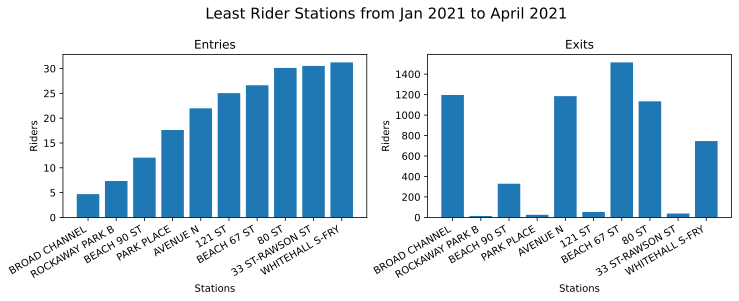

In [8]:
x = riders_station['STATION'][:10] 
y = riders_station['Entry_Count'][:10]
z  = riders_station['Exit_Count'][:10]



plt.figure(figsize=[12,3])

plt.suptitle('Least Rider Stations from Jan 2021 to April 2021',fontsize = 15, y=1.10)
plt.xlabel('Average Riders')


plt.subplot(1,2,1) # (number of rows, number of columns, number of plot)
plt.bar(x,y)
plt.title('Entries')
plt.xticks(rotation=30, ha='right');
plt.xlabel('Stations')
plt.ylabel('Riders')

plt.subplot(1,2,2)
plt.bar(x,z)
plt.title('Exits')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Stations')
plt.ylabel('Riders');

### Found this recent news article about Broad Channel street - https://www.rockawave.com/articles/stabbing-at-broad-channel-a-train/

## Grouping by days of the week

In [9]:
riders_day = turnstiles_df_cleaned.groupby(['STATION', pd.Grouper(key='Date_Time', freq = 'd', axis=0)]).sum()\
    .reset_index()

riders_day.head()

,STATION,Date_Time,Entry_Count,Exit_Count
0,1 AV,2021-01-16,985778.0,1381697.0
1,1 AV,2021-01-17,3738.0,6268.0
2,1 AV,2021-01-18,4557.0,7183.0
3,1 AV,2021-01-19,5711.0,8824.0
4,1 AV,2021-01-20,5598.0,8700.0


In [10]:
riders_day['Day']= riders_day['Date_Time'].dt.dayofweek

In [11]:
days_week = [[0, 'Monday'], [1, 'Tuesday'], [2, 'Wednesday'], [3,'Thursday'],[4,'Friday'], [5, 'Saturday'], [6,'Sunday' ]]

In [12]:
df_weekdays = pd.DataFrame(days_week, columns = ['Day', 'Day_Name'])

In [13]:
riders_day_new = pd.merge(riders_day,df_weekdays, on = 'Day',how='left')

In [14]:
riders_day_new = riders_day_new.drop(['Day'], axis=1)

In [15]:
mask = ((riders_day_new["Day_Name"] == "Saturday"))
riders_day_new[mask].sort_values(by=['Entry_Count'],ascending=False )
riders_day_new[mask].head(10)

,STATION,Date_Time,Entry_Count,Exit_Count,Day_Name
0,1 AV,2021-01-16,985778.0,1381697.0,Saturday
7,1 AV,2021-01-23,998231.0,1404513.0,Saturday
14,1 AV,2021-01-30,1010685.0,1425365.0,Saturday
21,1 AV,2021-02-06,586813.0,1047878.0,Saturday
28,1 AV,2021-02-13,683583.0,1394865.0,Saturday
35,1 AV,2021-02-20,1047235.0,1476453.0,Saturday
42,1 AV,2021-02-27,1061249.0,1502509.0,Saturday
49,1 AV,2021-03-06,1075361.0,1528974.0,Saturday
56,1 AV,2021-03-13,1089466.0,1557832.0,Saturday
63,1 AV,2021-03-20,1094227.0,1585479.0,Saturday


## Rider Volume by days of the week

In [16]:
riders_days = riders_day_new.groupby(['Day_Name']).mean()\
    .reset_index()

riders_days.head(10) 

,Day_Name,Entry_Count,Exit_Count
0,Friday,5138.123625,5323.868839
1,Monday,5214.376221,5149.917345
2,Saturday,574536.431305,633994.108691
3,Sunday,2584.243639,2815.412172
4,Thursday,5750.800978,5089.555307
5,Tuesday,5368.949511,5227.901466
6,Wednesday,5029.649023,5137.129682


In [17]:
# Extremly large volumes on Saturday

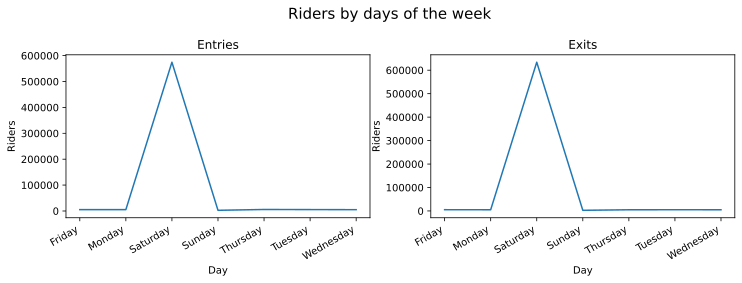

In [18]:
x = riders_days['Day_Name']
y = riders_days['Entry_Count']
z = riders_days['Exit_Count']

plt.figure(figsize=[12,3])

plt.suptitle('Riders by days of the week',fontsize = 15, y=1.10)
plt.xlabel('Average Riders')


plt.subplot(1,2,1) # (number of rows, number of columns, number of plot)
plt.plot(x,y)
plt.title('Entries')
plt.xticks(rotation=30, ha='right');
plt.xlabel('Day')
plt.ylabel('Riders')

plt.subplot(1,2,2)
plt.plot(x,z)
plt.title('Exits')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Day')
plt.ylabel('Riders');

In [19]:
#Seaborn pairplot # subplots

In [20]:
#Find the trend of riders over the days of the week overall and each station

In [21]:
#Find trend of riders over the last few months and each station

In [22]:
#Find the trend of riders in midnight, early morning, morning, afternoon, evening and night overall and each station

In [23]:
#Come up with a metric  ->turnstiles_df_cleaned Avg riders per station in a day -----> Below 60% ---> very less populated

In [24]:
#NYPD Complain Data and sort by station 

In [25]:
#Dynamic time warping 